# Unsupervised dimensionality reduction via principal component analysis

In [15]:
import pandas as pd
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler
df_wine = pd.read_csv(
    'https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data',
    header=None)
X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                   random_state=0)
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.fit_transform(X_test)

Σv = λv

λ : a scalar: the eigenvalue

v: a vector: eigenvectors

In [16]:
import numpy as np
cov_mat = np.cov(X_train_std.T) # covariance matrix
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)
print(eigen_vals)

[ 4.8923  2.4664  1.4281  1.0123  0.8491  0.6018  0.5225  0.0841  0.3305
  0.296   0.1683  0.2143  0.24  ]


[ 0.3733  0.5615  0.6705  0.7477  0.8125  0.8584  0.8983  0.9235  0.9461
  0.9644  0.9807  0.9936  1.    ]


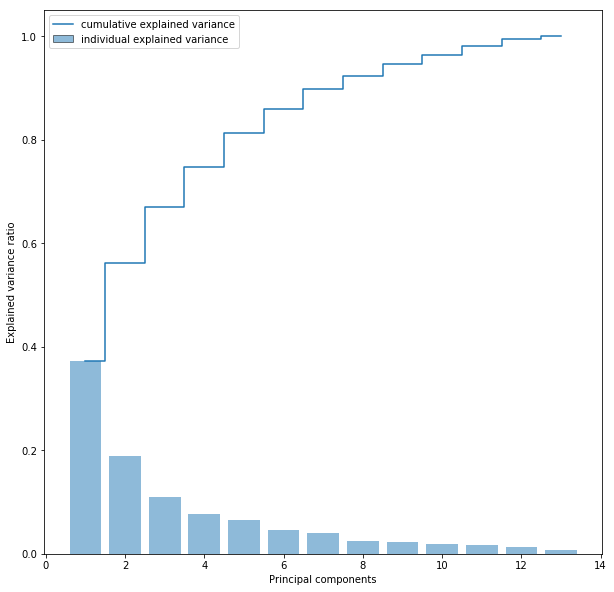

In [17]:
tot = sum(eigen_vals)
var_exp = [(i / tot) for i in 
          sorted(eigen_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print(cum_var_exp)

import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.bar(range(1, 14), var_exp, alpha=0.5, align="center",
       label="individual explained variance")
plt.step(range(1, 14), cum_var_exp, where="mid",
        label="cumulative explained variance")
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.show()

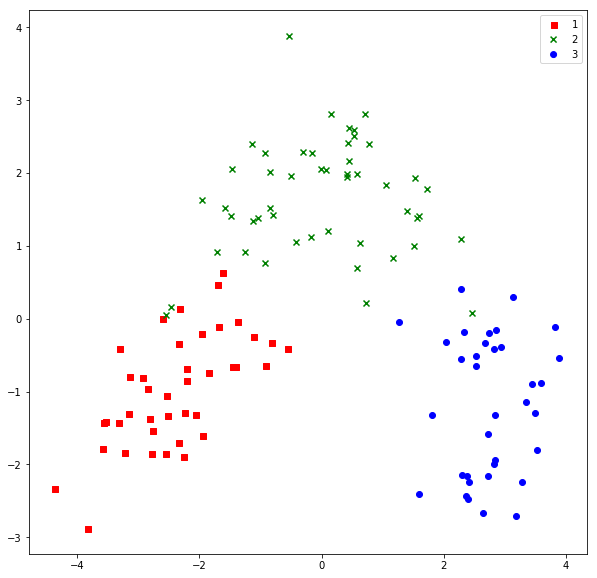

In [18]:
eigen_pairs = [(eigen_vals[i], eigen_vecs[:, i])
               for i in range(len(eigen_vals))]
eigen_pairs.sort(reverse=True)
w = np.hstack((eigen_pairs[0][1][:, np.newaxis],
              eigen_pairs[1][1][:, np.newaxis]))
X_train_pca = X_train_std.dot(w)
colors = ['r', 'g', 'b']
markers = ['s', 'x', 'o']
plt.figure(figsize=(10,10))
for l, c, m in zip(np.unique(y_train), colors, markers):
    plt.scatter(X_train_pca[y_train==l, 0] * (-1),
               X_train_pca[y_train==l, 1] * (-1),
               c=c, label=l, marker=m)
plt.legend()
plt.show()

## Using sklearn

In [19]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
%matplotlib inline

def plot_decision_regions(X, y, classifier,
                         test_idx=None, resolution=0.02):
    # setup marker generator and color map
    markers = ('o', 'x', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
    np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    # plot all samples
    X_test, y_test = X[test_idx, :], y[test_idx]
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=cmap(idx),
                    marker=markers[idx], label=cl)
    
    # highlight test samples
    if test_idx:
        X_test, y_test = X[test_idx, :], y[test_idx]
        plt.scatter(X_test[:, 0], X_test[:, 1], c='',
                    alpha=1.0, linewidth=1, marker='_',
                    s=55, label='test set')

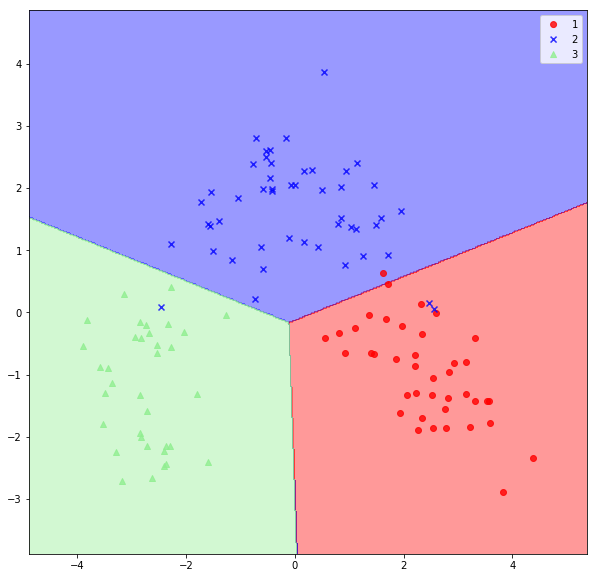

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
lr = LogisticRegression()
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.fit_transform(X_test_std)
lr.fit(X_train_pca, y_train)
plt.figure(figsize=(10,10))
plot_decision_regions(X_train_pca, y_train, classifier=lr)
plt.legend()
plt.show()

In [21]:
# compose:
print(w.T)
print(pca.components_ )

[[ 0.1467 -0.2422 -0.0299 -0.2552  0.1208  0.3893  0.4233 -0.3063  0.3057
  -0.0987  0.3003  0.3682  0.2926]
 [ 0.5042  0.2422  0.287  -0.0647  0.23    0.0936  0.0109  0.0187  0.0304
   0.5453 -0.2792 -0.1744  0.3632]]
[[-0.1479  0.2431 -0.0883  0.1743 -0.2131 -0.4086 -0.4229  0.2659 -0.3371
   0.0412 -0.2714 -0.3862 -0.2842]
 [ 0.4127  0.1988  0.3644  0.1274  0.3942 -0.0167 -0.0489  0.0851  0.0265
   0.5011 -0.2896 -0.1613  0.3378]]


# Supervised data compression via linear discriminant analysis

In [22]:
np.set_printoptions(precision=4) # in den 4 chu so thap phan
mean_vecs = []
for label in range(1,4):
    mean_vecs.append(np.mean(
        X_train_std[y_train==label], axis=0))
    print('MV %s: %s\n' %(label, mean_vecs[label-1]))

MV 1: [ 0.9259 -0.3091  0.2592 -0.7989  0.3039  0.9608  1.0515 -0.6306  0.5354
  0.2209  0.4855  0.798   1.2017]

MV 2: [-0.8727 -0.3854 -0.4437  0.2481 -0.2409 -0.1059  0.0187 -0.0164  0.1095
 -0.8796  0.4392  0.2776 -0.7016]

MV 3: [ 0.1637  0.8929  0.3249  0.5658 -0.01   -0.9499 -1.228   0.7436 -0.7652
  0.979  -1.1698 -1.3007 -0.3912]



In [23]:
d = 13  # number of features
S_W = np.zeros((d, d))
for label, mv in zip(range(1, 4), mean_vecs):
    class_scatter = np.cov(X_train_std[y_train == label].T)
    S_W += class_scatter
print('Scaled within-class scatter matrix: %sx%s' % (S_W.shape[0],
                                                     S_W.shape[1]))

Scaled within-class scatter matrix: 13x13


In [24]:
# Between-class scatter matrix
mean_overall = np.mean(X_train_std, axis=0)
S_B = np.zeros((d, d))
for i, mv in enumerate(mean_vecs):
    n = X_train[y_train == i + 1, :].shape[0]
    mv = mv.reshape(d, 1)
    mean_overall = mean_overall.reshape(d, 1)
    S_B += n * (mv - mean_overall).dot((mv - mean_overall).T)
print('Between-class scatter matrix: %sx%s'
      % (S_B.shape[0], S_B.shape[1]))

Between-class scatter matrix: 13x13


In [25]:
eigen_vals, eigen_vecs =\
    np.linalg.eig(np.linalg.inv(S_W).dot(S_B))
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[i,:])
              for i in range(len(eigen_vals))]
eigen_pairs = sorted(eigen_pairs, 
                    key = lambda k : k[0], reverse=True)
print('Eigenvalues in decreasing order:\n')
for eigen_val in eigen_pairs:
    print(eigen_val[0])

Eigenvalues in decreasing order:

452.721581245
156.43636122
4.59251929859e-14
4.59251929859e-14
3.26829990974e-14
3.26829990974e-14
2.84217094304e-14
1.6368913407e-14
1.60411405022e-14
1.00167190488e-14
1.00167190488e-14
7.90995771156e-15
1.44140019437e-15


[[-0.2383 -0.1244]
 [-0.3816 -0.2206]
 [-0.0217  0.0386]
 [-0.5252 -0.0298]
 [-0.5252 -0.0298]
 [ 0.1143 -0.3385]
 [ 0.1143 -0.3385]
 [-0.1585  0.154 ]
 [-0.1981  0.1154]
 [-0.1981  0.1154]
 [ 0.0148 -0.2404]
 [ 0.0613  0.1457]
 [-0.4802 -0.1623]]


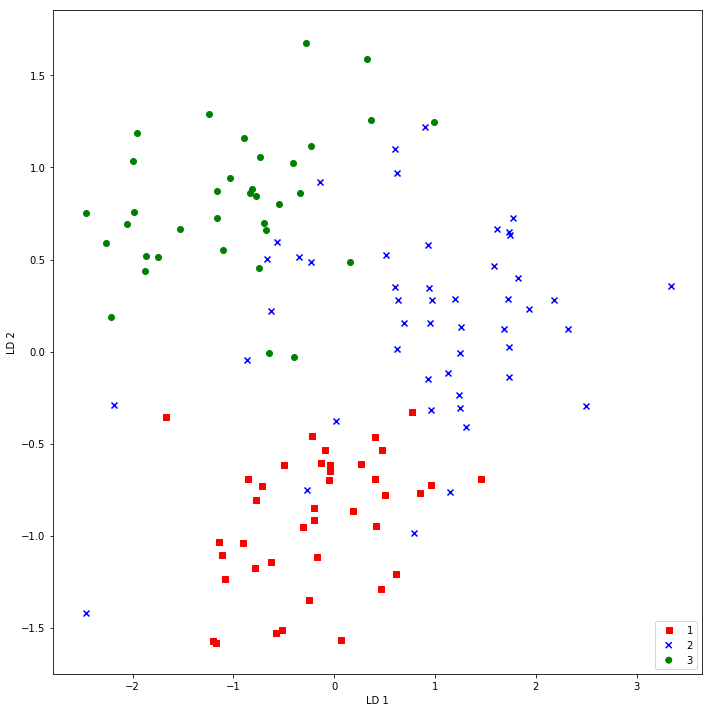

In [27]:
w = np.hstack((eigen_pairs[0][1][:, np.newaxis].real,
             eigen_pairs[1][1][:, np.newaxis].real))
print(w)
X_train_lda = X_train_std.dot(w)
colors = ['r', 'b', 'g']
markers = ['s', 'x', 'o']
plt.figure(figsize=(10,10))
for l, c, m in zip(np.unique(y_train), colors, markers):
    plt.scatter(X_train_lda[y_train == l, 0],
                X_train_lda[y_train == l, 1],
                c=c, label=l, marker=m)

plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.legend(loc='lower right')
plt.tight_layout()
# plt.savefig('./figures/lda2.png', dpi=300)
plt.show()

## LDA via sklearn

In [28]:
from sklearn.lda import LDA
lda = LDA(n_components=2)
X_train_lda = lda.fit_transform(X_train_std, y_train)

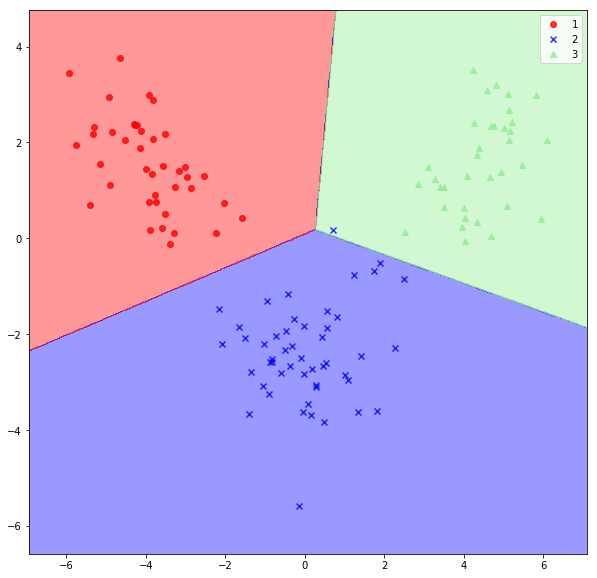

In [29]:
lr = LogisticRegression()
lr = lr.fit(X_train_lda, y_train)
plt.figure(figsize=(10,10))
plot_decision_regions(X_train_lda, y_train,
                     classifier=lr)
plt.legend()
plt.show()

# Using kernel principal component analysis for nonlinear mappings

In [50]:
from scipy.spatial.distance import pdist, squareform
from scipy import exp
from scipy.linalg import eigh
import numpy as np

def rbf_kernel_pca(X, gamma, n_components):
    """
    RBF kernel PCA implementation.
    Parameters
    ------------
    X: {NumPy ndarray}, shape = [n_samples, n_features]
    gamma: float
    Tuning parameter of the RBF kernel
    n_components: int
    Number of principal components to return
    Returns
    ------------
    X_pc: {NumPy ndarray}, shape = [n_samples, k_features]
    Projected dataset
    """
    # Calculate pairwise squared Euclidean distances
    # in the MxN dimensional dataset.
    sq_dists = pdist(X, "sqeuclidean")     
    mat_sq_dists = squareform(sq_dists) # convert into squre matrix
    
    K = exp(-gamma * mat_sq_dists)
    N = K.shape[0]
    one_n = np.ones((N, N)) / N
    K = K - one_n.dot(K) - K.dot(one_n) + one_n.dot(K).dot(one_n) 
    eigvals, eigvecs = eigh(K)
    
    X_pc = np.column_stack((eigvecs[:, -i]
                           for i in range(1, n_components + 1)))
    return X_pc

## Example 1 – separating half-moon shapes

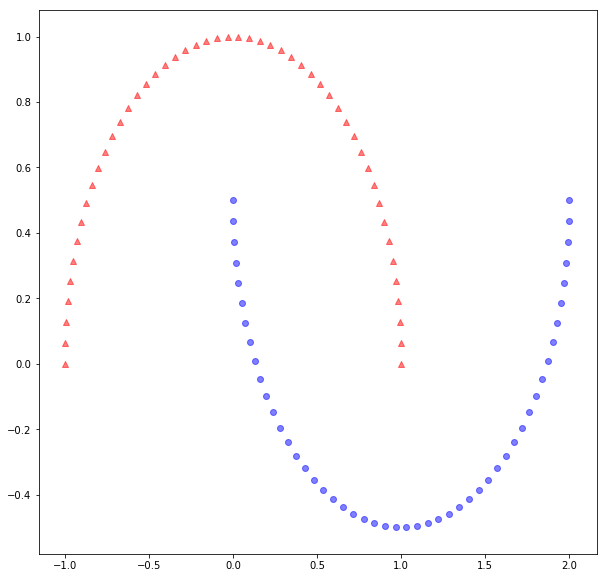

In [44]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=100, random_state=123)
plt.figure(figsize=(10,10))
plt.scatter(X[y==0, 0], X[y==0, 1],
             color="red", marker="^", alpha=0.5)
plt.scatter(X[y==1, 0], X[y==1, 1],
           color="blue", marker="o", alpha=0.5)
plt.show()

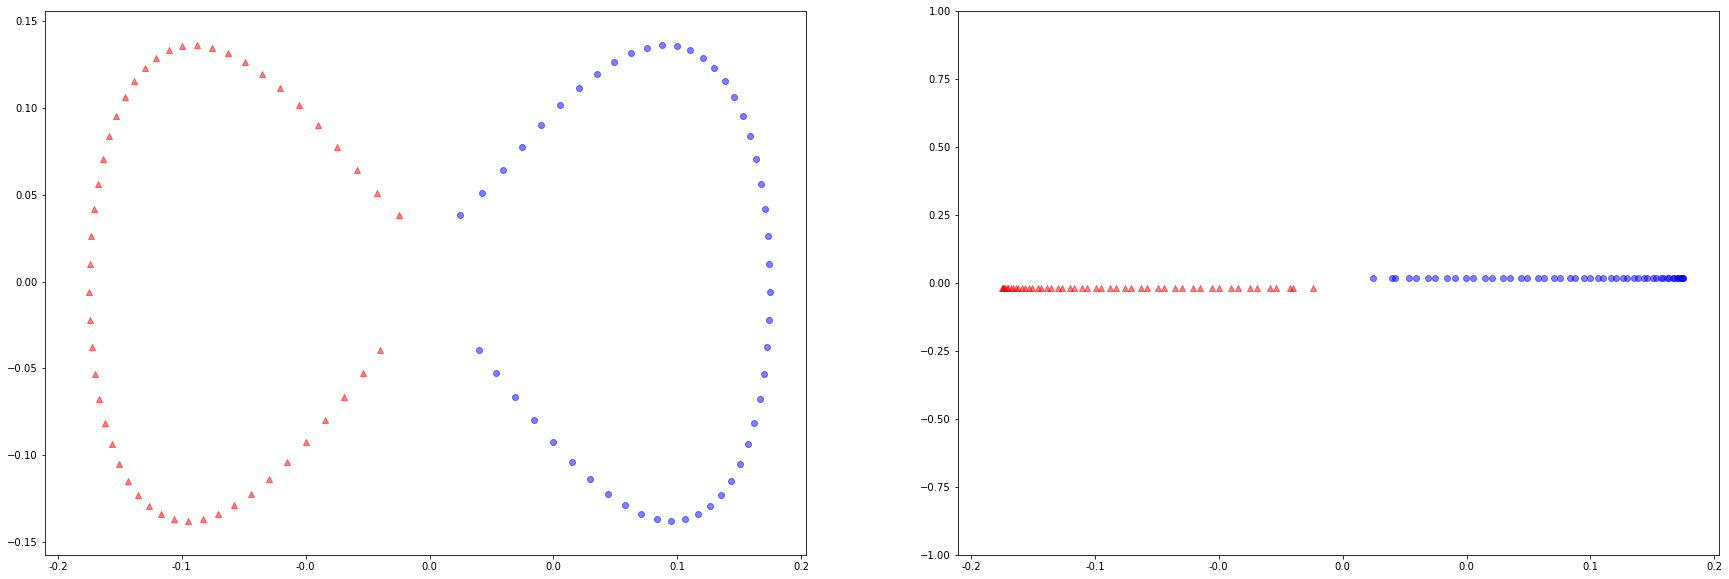

In [53]:
from matplotlib.ticker import FormatStrFormatter
X_kpca = rbf_kernel_pca(X, gamma=15, n_components=2)
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(30,10))
ax[0].scatter(X_kpca[y==0, 0], X_kpca[y==0, 1],
             color="red", marker="^", alpha=0.5)
ax[0].scatter(X_kpca[y==1, 0], X_kpca[y==1, 1],
             color="blue", marker="o", alpha=0.5)
ax[1].scatter(X_kpca[y==0, 0], np.zeros((50,1)) -0.02,
              color="red", marker="^", alpha=0.5)
ax[1].scatter(X_kpca[y==1, 0], np.zeros((50,1)) +0.02,
              color="blue", marker="o", alpha=0.5)
ax[1].set_ylim([-1, 1])
ax[0].xaxis.set_major_formatter(FormatStrFormatter('%0.1f'))
ax[1].xaxis.set_major_formatter(FormatStrFormatter('%0.1f'))
plt.show()

## Example 2 – separating concentric circles

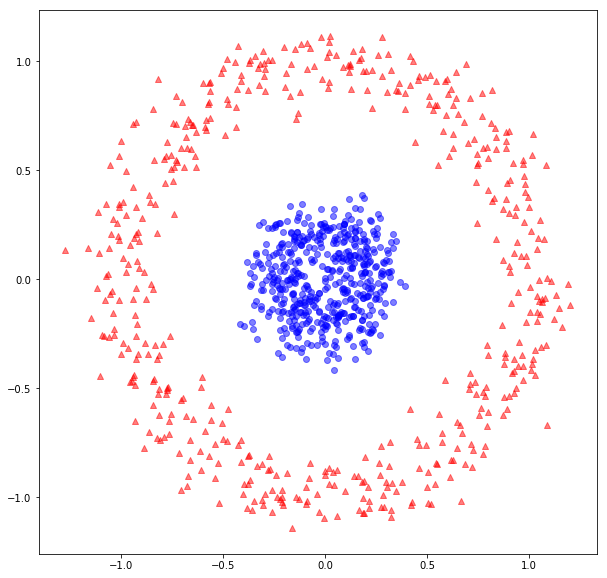

In [54]:
from sklearn.datasets import make_circles
X, y = make_circles(n_samples=1000,
                   random_state=123, noise=0.1, factor=0.2)
plt.figure(figsize=(10,10))
plt.scatter(X[y==0, 0], X[y==0, 1],
             color="red", marker="^", alpha=0.5)
plt.scatter(X[y==1, 0], X[y==1, 1],
           color="blue", marker="o", alpha=0.5)
plt.show()

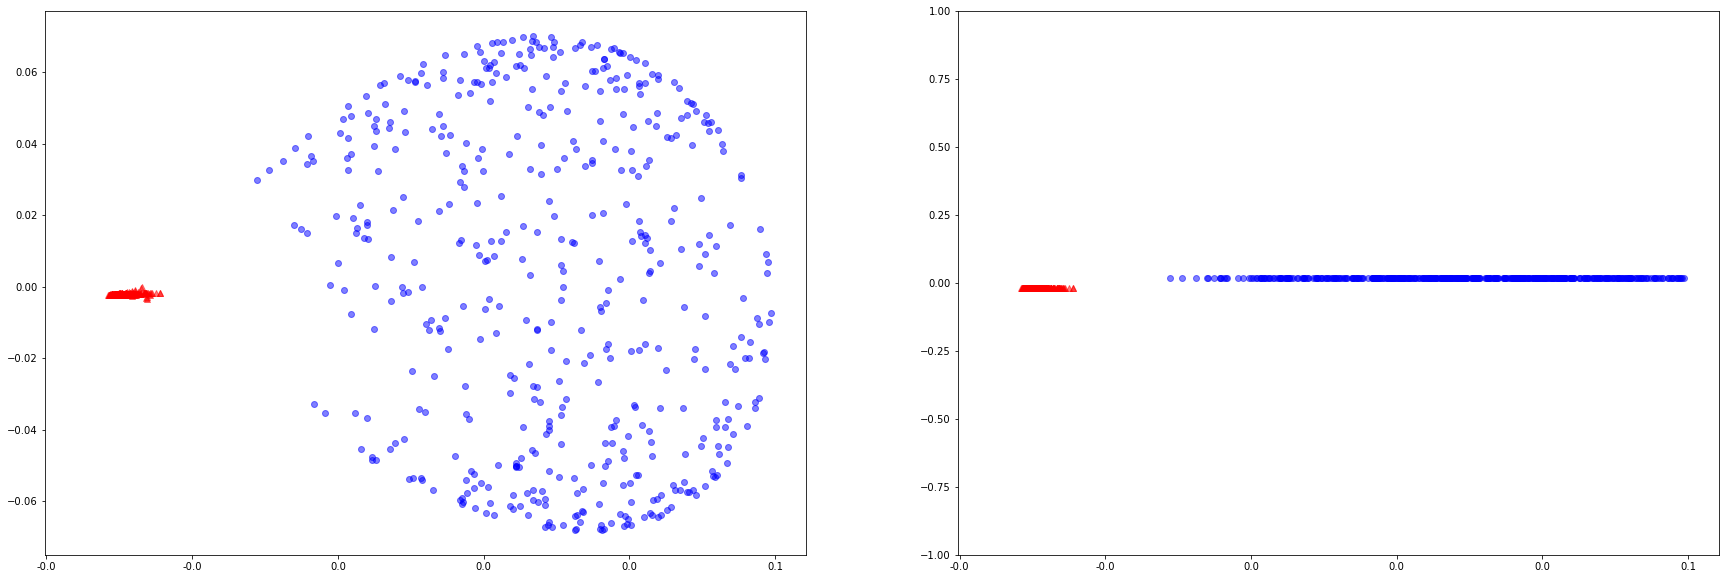

In [56]:
X_kpca = rbf_kernel_pca(X, gamma=15, n_components=2)
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(30,10))
ax[0].scatter(X_kpca[y==0, 0], X_kpca[y==0, 1],
             color="red", marker="^", alpha=0.5)
ax[0].scatter(X_kpca[y==1, 0], X_kpca[y==1, 1],
             color="blue", marker="o", alpha=0.5)
ax[1].scatter(X_kpca[y==0, 0], np.zeros((500,1)) -0.02,
              color="red", marker="^", alpha=0.5)
ax[1].scatter(X_kpca[y==1, 0], np.zeros((500,1)) +0.02,
              color="blue", marker="o", alpha=0.5)
ax[1].set_ylim([-1, 1])
ax[0].xaxis.set_major_formatter(FormatStrFormatter('%0.1f'))
ax[1].xaxis.set_major_formatter(FormatStrFormatter('%0.1f'))
plt.show()

In [60]:
def rbf_kernel_pca(X, gamma, n_components):
    """
    RBF kernel PCA implementation.
    Parameters
    ------------
    X: {NumPy ndarray}, shape = [n_samples, n_features]
    gamma: float
    Tuning parameter of the RBF kernel
    n_components: int
    Number of principal components to return
    Returns
    ------------
    X_pc: {NumPy ndarray}, shape = [n_samples, k_features]
    Projected dataset
    """
    # Calculate pairwise squared Euclidean distances
    # in the MxN dimensional dataset.
    sq_dists = pdist(X, "sqeuclidean")     
    mat_sq_dists = squareform(sq_dists) # convert into squre matrix
    
    K = exp(-gamma * mat_sq_dists)
    N = K.shape[0]
    one_n = np.ones((N, N)) / N
    K = K - one_n.dot(K) - K.dot(one_n) + one_n.dot(K).dot(one_n) 
    eigvals, eigvecs = eigh(K)
    
    alphas = np.column_stack((eigvecs[:, -i]
                           for i in range(1, n_components + 1)))
    lambdas = [eigvals[-i] for i in range(1, n_components + 1)]
    return alphas, lambdas

In [73]:
X, y = make_moons(n_samples=100, random_state=123)
alphas, lambdas = rbf_kernel_pca(X, gamma=15, n_components=1)
x_new = X[25]
x_proj = alphas[25]

In [77]:

def project_x(x_new, X, gamma, alphas, lambdas):
    pair_dist = np.array([np.sum((x_new - row)**2) for row in X])
    k = np.exp(-gamma * pair_dist)
    return k.dot(alphas / lambdas)

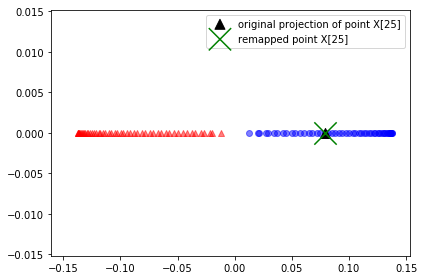

In [79]:
x_reproj = project_x(x_new, X, gamma=15, alphas=alphas, lambdas=lambdas)
x_reproj
plt.scatter(alphas[y == 0, 0], np.zeros((50)),
            color='red', marker='^', alpha=0.5)
plt.scatter(alphas[y == 1, 0], np.zeros((50)),
            color='blue', marker='o', alpha=0.5)
plt.scatter(x_proj, 0, color='black',
            label='original projection of point X[25]', marker='^', s=100)
plt.scatter(x_reproj, 0, color='green',
            label='remapped point X[25]', marker='x', s=500)
plt.legend(scatterpoints=1)

plt.tight_layout()
# plt.savefig('./figures/reproject.png', dpi=300)
plt.show()

# Kernel principal component analysis in scikit-learn

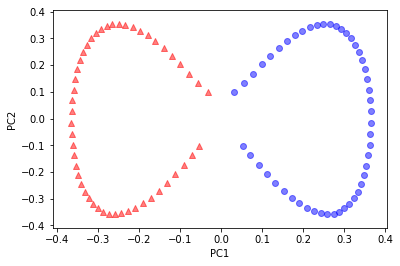

In [82]:
from sklearn.decomposition import KernelPCA
skit_pca = KernelPCA(n_components=2,
                    kernel="rbf", gamma=15)
X_skpca = skit_pca.fit_transform(X)
plt.scatter(X_skpca[y==0, 0], X_skpca[y==0, 1],
            color='red', marker='^', alpha=0.5)
plt.scatter(X_skpca[y==1, 0], X_skpca[y==1, 1],
            color='blue', marker='o', alpha=0.5)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()